<a href="https://colab.research.google.com/github/pvdklei/modelsmakemodels/blob/master/sebas/report_notebooks/autoencoder_layer_comparison_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries and packages

import torch
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import utils
import train
import importlib
import visual_tools as vt
from skimage.util import random_noise


In [2]:
# define image loaders

def loaders():
    traintransform = transforms.Compose([transforms.ToTensor(),
                                         transforms.Resize(128),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    testtransform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Resize(128),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    batch_size = 32
    num_workers = 2

    trainset = datasets.CIFAR10("/data/cifar10/train", train=True, transform=traintransform, download=True)
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

    testset = datasets.CIFAR10("/data/cifar10/test", train=False, transform=testtransform, download=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    return trainloader, testloader

Extracting /data/cifar10/train/cifar-10-python.tar.gz to /data/cifar10/train


Extracting /data/cifar10/test/cifar-10-python.tar.gz to /data/cifar10/test


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


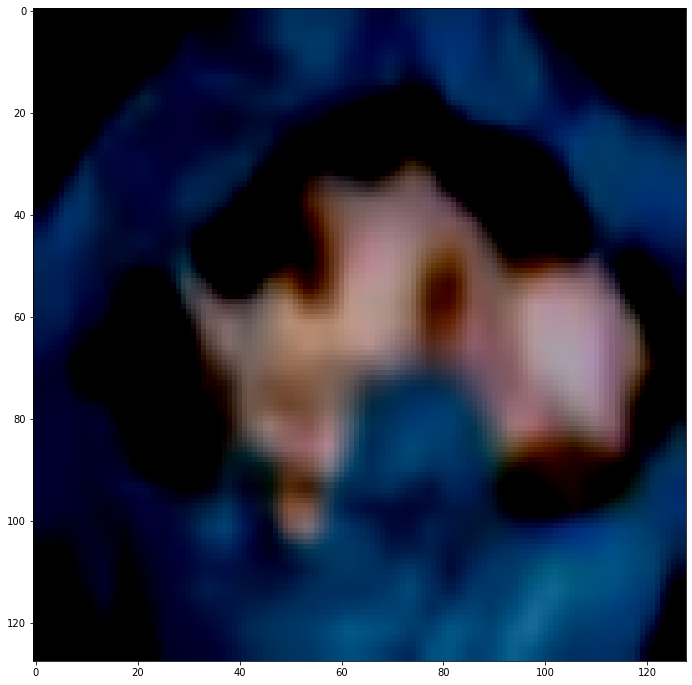

In [3]:
# visualize data

trainloader, _ = loaders()
images, labels = next(iter(trainloader))
vt.show_image(images[0])

In [4]:
# create 2 layered autoencoder

encoder = nn.Sequential(nn.Conv2d(3,64, kernel_size=4, stride = 2, padding = 1,),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size = 4, stride = 2),
                        nn.Conv2d(64,64, kernel_size=4, stride = 2, padding = 1,),
                        nn.ReLU())
decoder = nn.Sequential(nn.ConvTranspose2d(64, 64, 4, stride=2, padding=1),
                        nn.ReLU(),
                        nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1),
                        transforms.Resize(128))

model1 = nn.Sequential(encoder, decoder)
print(model1)
model1(images).shape

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): ReLU()
  )
  (1): Sequential(
    (0): ConvTranspose2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): Resize(size=128, interpolation=PIL.Image.BILINEAR)
  )
)


torch.Size([32, 3, 128, 128])

In [5]:
# create 3 layered autoencoder

encoder1 = nn.Sequential(nn.Conv2d(3,64, kernel_size=4, stride = 2, padding = 1,),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size = 4, stride = 2),
                        nn.Conv2d(64,192, kernel_size=4, stride = 2, padding = 1,),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size = 4, stride = 2),
                        nn.Conv2d(192,192, kernel_size=4, stride = 2, padding = 1,),
                        nn.ReLU())

decoder1 = nn.Sequential(nn.ConvTranspose2d(192, 192, 4, stride=2, padding=1),
                        nn.ReLU(),
                        nn.ConvTranspose2d(192, 64, 4, stride=2, padding=1),
                        nn.ReLU(),
                        nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1),
                        transforms.Resize(128))

model2 = nn.Sequential(encoder1, decoder1)

print(model2)
model2(images).shape

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (1): Sequential(
    (0): ConvTranspose2d(192, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(192, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): Resize(size=128, interpolation=PIL.Image.BILINEAR)
  )
)


torch.Size([32, 3, 128, 128])

In [6]:
# create 4 layered autoencoder

encoder2 = nn.Sequential(nn.Conv2d(3,64, kernel_size=4, stride = 2, padding = 1,),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size = 4, stride = 2),
                        nn.Conv2d(64,192, kernel_size=4, stride = 2, padding = 1,),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size = 4, stride = 2),
                        nn.Conv2d(192,384, kernel_size=4, stride = 2, padding = 1,),
                        nn.ReLU(),
                        nn.Conv2d(384,384, kernel_size=4, stride = 2, padding = 1,),
                        nn.ReLU())

decoder2 = nn.Sequential(nn.ConvTranspose2d(384, 384, 4, stride=2, padding=1),
                        nn.ReLU(),
                        nn.ConvTranspose2d(384, 192, 4, stride=2, padding=1),
                        nn.ReLU(),
                        nn.ConvTranspose2d(192, 64, 4, stride=2, padding=1),
                        nn.ReLU(),
                        nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1),
                        transforms.Resize(128))

model3 = nn.Sequential(encoder2, decoder2)

print(model3)
model3(images).shape

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 384, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): ReLU()
  )
  (1): Sequential(
    (0): ConvTranspose2d(384, 384, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(384, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(192, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): Resize(size=1

torch.Size([32, 3, 128, 128])

In [6]:
# create trainings

training1 = train.Training(autotrain=True)
training2 = train.Training(autotrain=True)
training3 = train.Training(autotrain=True)
assert len(training1.train_losses) == 0
assert len(training2.train_losses) == 0
assert len(training3.train_losses) == 0

In [7]:
# train 2 layered model
training1.train(model=model1,
               loaders=loaders,
               optimizer=optim.Adam(params=model1.parameters(), lr=0.001),
               criterion=nn.MSELoss(),
               epochs=10,
               reload_=False)

Files already downloaded and verified
Files already downloaded and verified
Training on:  cuda
New epoch: 0
Validation loss: 0.246
Training loss: 0.013
New epoch: 1
Validation loss: 0.009
Training loss: 0.009
New epoch: 2
Validation loss: 0.008
Training loss: 0.008
New epoch: 3
Validation loss: 0.008
Training loss: 0.007
New epoch: 4
Validation loss: 0.008
Training loss: 0.007
New epoch: 5
Validation loss: 0.007
Training loss: 0.007
New epoch: 6
Validation loss: 0.007
Training loss: 0.007
New epoch: 7
Validation loss: 0.007
Training loss: 0.007
New epoch: 8
Validation loss: 0.007
Training loss: 0.007
New epoch: 9
Validation loss: 0.007
Training loss: 0.007


In [8]:
# save model

torch.save(model1.state_dict(), 'Autoencoder_2layered.model')

In [10]:
# train 3 layered model

training2.train(model=model2,
               loaders=loaders,
               optimizer=optim.Adam(params=model2.parameters(), lr=0.001),
               criterion=nn.MSELoss(),
               epochs=10,
               reload_=False)

Files already downloaded and verified
Files already downloaded and verified
Training on:  cuda
New epoch: 0
Validation loss: 0.241
Training loss: 0.045
New epoch: 1
Validation loss: 0.03
Training loss: 0.027
New epoch: 2
Validation loss: 0.024
Training loss: 0.023
New epoch: 3
Validation loss: 0.022
Training loss: 0.021
New epoch: 4
Validation loss: 0.021
Training loss: 0.02
New epoch: 5
Validation loss: 0.02
Training loss: 0.019
New epoch: 6
Validation loss: 0.019
Training loss: 0.018
New epoch: 7
Validation loss: 0.019
Training loss: 0.018
New epoch: 8
Validation loss: 0.018
Training loss: 0.017
New epoch: 9
Validation loss: 0.017
Training loss: 0.017


In [12]:
# train 4 layered model

training3.train(model=model3,
               loaders=loaders,
               optimizer=optim.Adam(params=model3.parameters(), lr=0.001),
               criterion=nn.MSELoss(),
               epochs=10,
               reload_=False)

Files already downloaded and verified
Files already downloaded and verified
Training on:  cuda
New epoch: 0
Validation loss: 0.25
Training loss: 0.078
New epoch: 1
Validation loss: 0.059
Training loss: 0.05
New epoch: 2
Validation loss: 0.046
Training loss: 0.043
New epoch: 3
Validation loss: 0.04
Training loss: 0.039
New epoch: 4
Validation loss: 0.038
Training loss: 0.037
New epoch: 5
Validation loss: 0.037
Training loss: 0.035
New epoch: 6
Validation loss: 0.036
Training loss: 0.034
New epoch: 7
Validation loss: 0.035
Training loss: 0.032
New epoch: 8
Validation loss: 0.033
Training loss: 0.031
New epoch: 9
Validation loss: 0.031
Training loss: 0.03


Title: 
 

Done training after 623.4 seconds


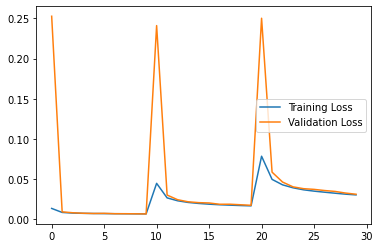

In [13]:
# show summary of trainings

training3.summary()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


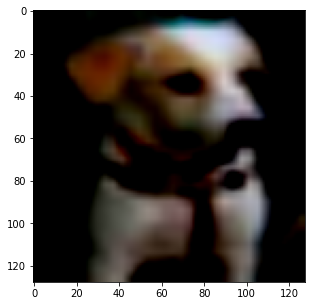

In [14]:
# prepare models for image visualization

im = images[0]
model1 = model1.to('cpu')
model2 = model2.to('cpu')
model3 = model3.to('cpu')
im1 = model1(images)
im2 = model2(images)
im3 = model3(images)

vt.show_image(im, (5,5))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


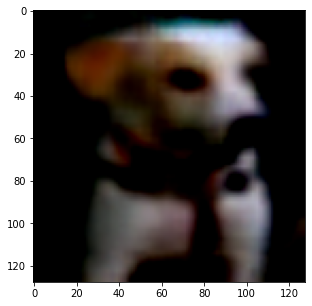

In [15]:
# image reconstruction 2 layered autoencoder

vt.show_image(im1[0], (5,5))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


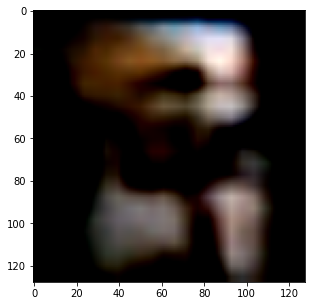

In [16]:
# image reconstruction 3 layered autoencoder

vt.show_image(im2[0], (5,5))

The MSE loss is:  0.002953454852104187


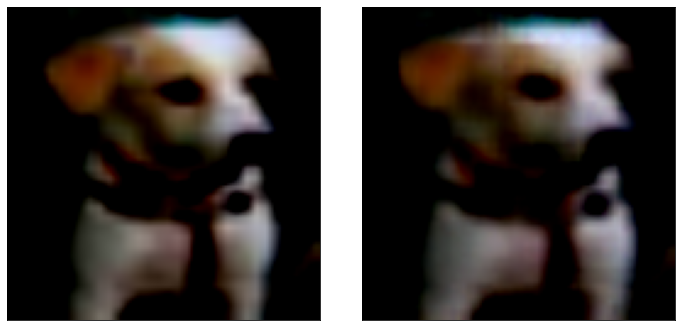





The MSE loss is:  0.000663592538330704


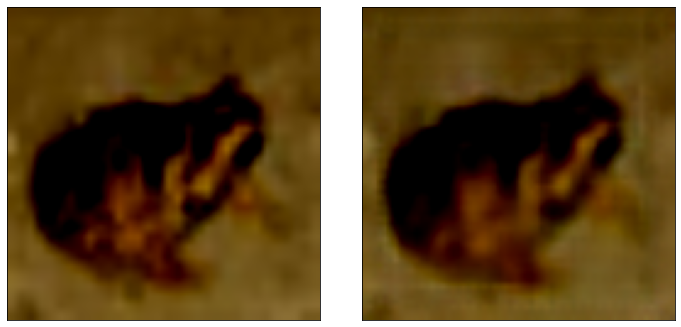





The MSE loss is:  0.004556500352919102


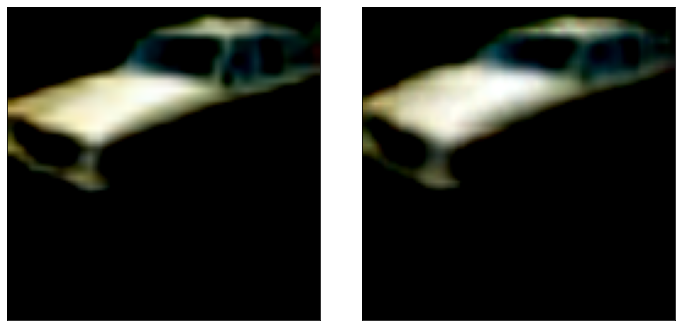





The MSE loss is:  0.0016525044338777661


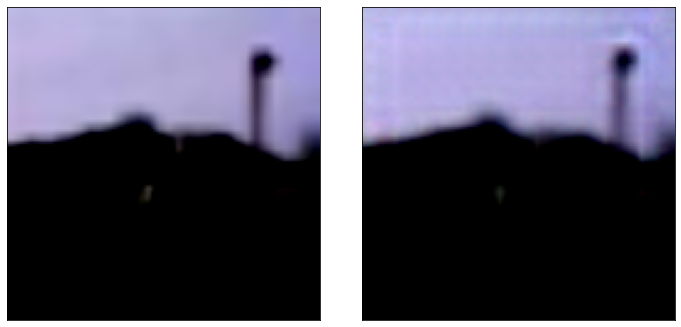





The MSE loss is:  0.0015502003952860832


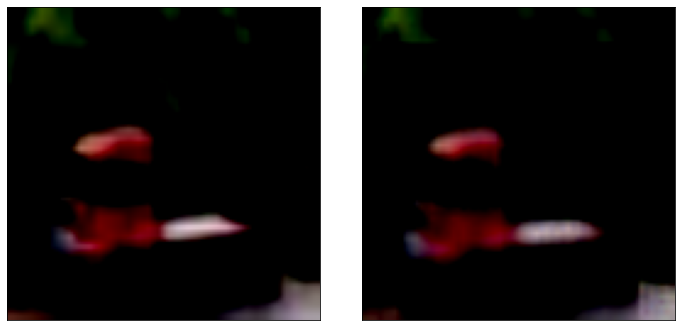





The MSE loss is:  0.004155481234192848


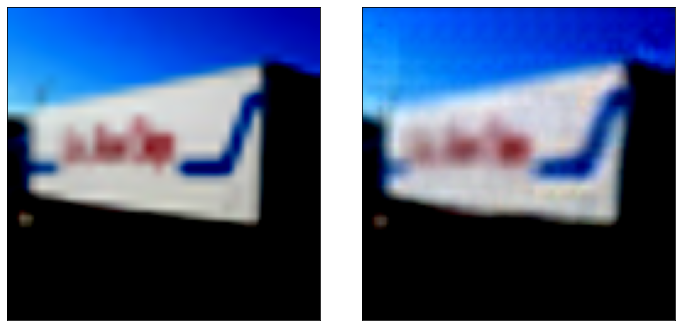





The MSE loss is:  0.0034003437031060457


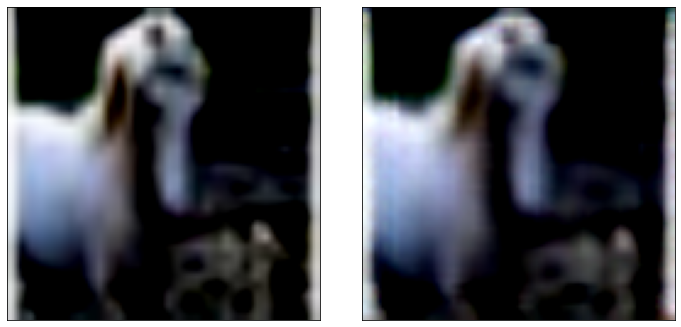





The MSE loss is:  0.003617785172536969


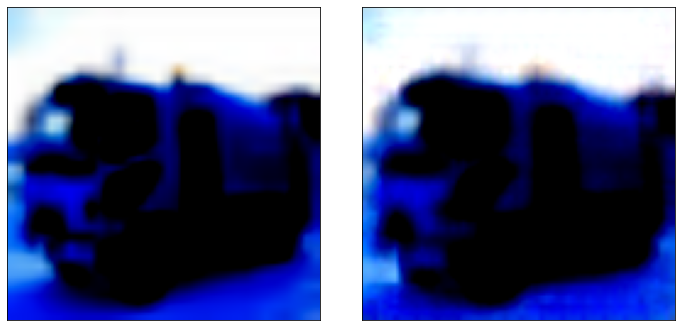





The MSE loss is:  0.00414151418954134


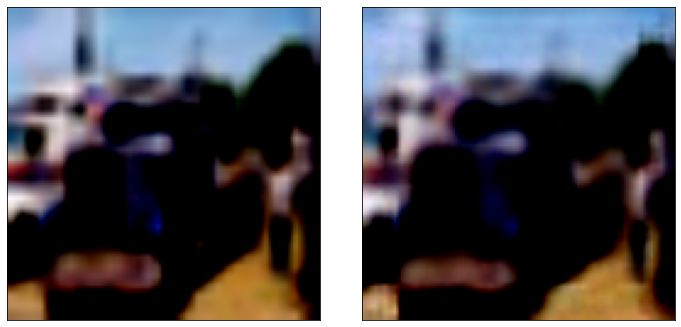





The MSE loss is:  0.0005793378804810345


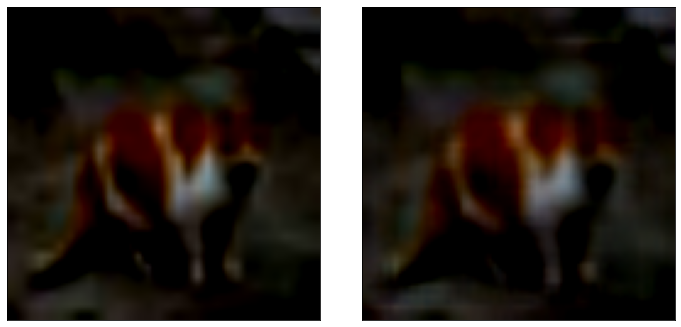





The MSE loss is:  0.00020153896184638143


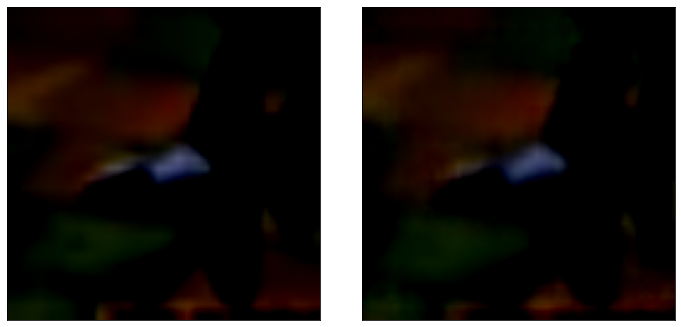





The MSE loss is:  0.008677162230014801


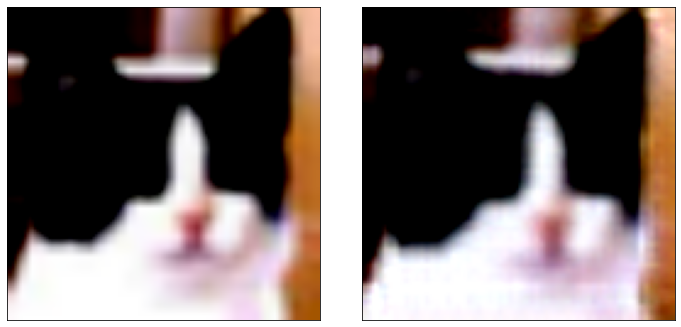





The MSE loss is:  0.00044316702405922115


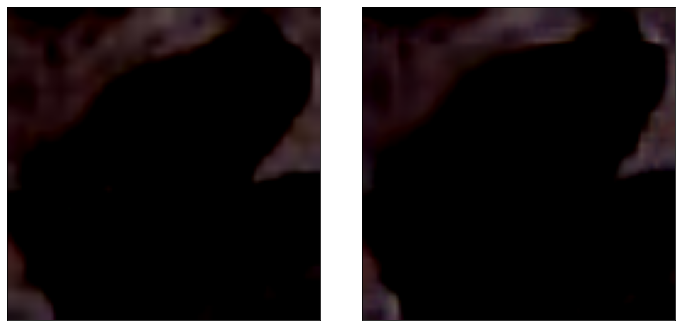





The MSE loss is:  0.00014689743693452328


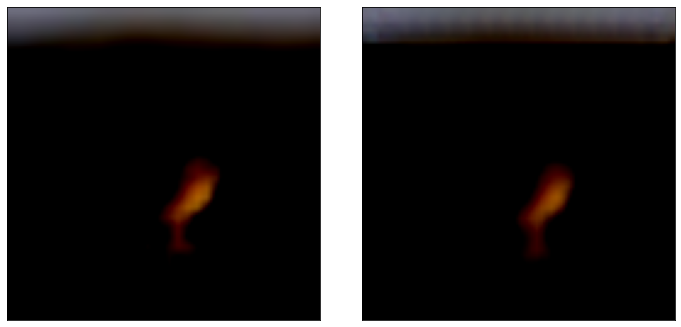





The MSE loss is:  0.001954920357093215


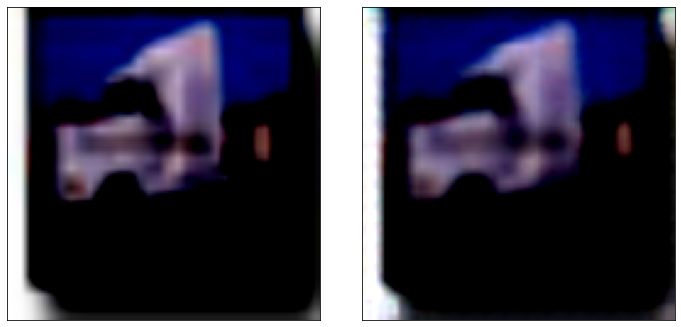





The MSE loss is:  0.0006195772439241409


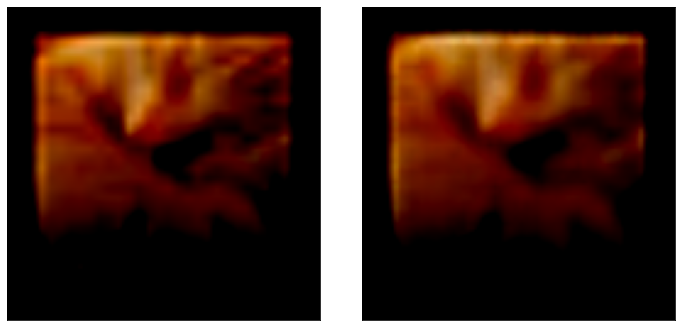





The MSE loss is:  0.0037932584527879953


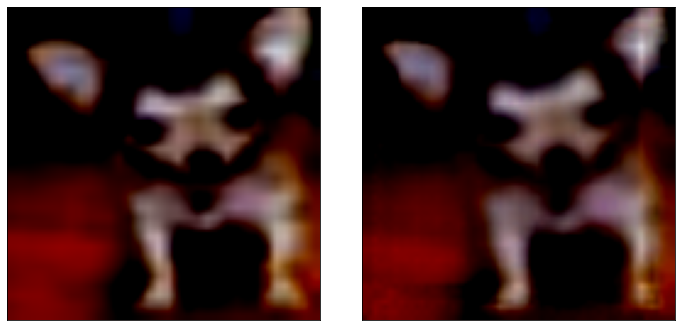





The MSE loss is:  0.0013086814433336258


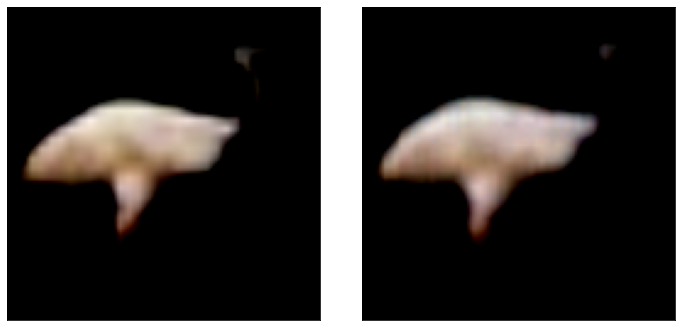





The MSE loss is:  0.0008147875778377056


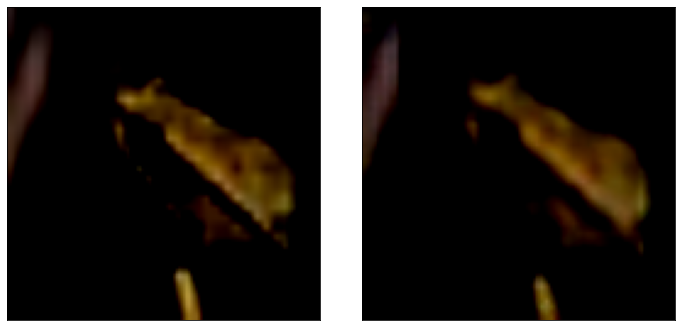





The MSE loss is:  0.002905505010858178


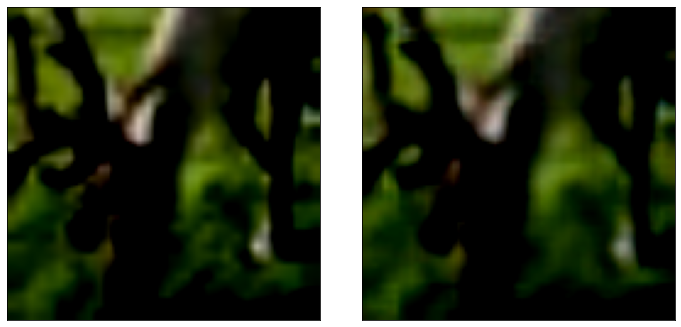





The MSE loss is:  0.0005080661503598094


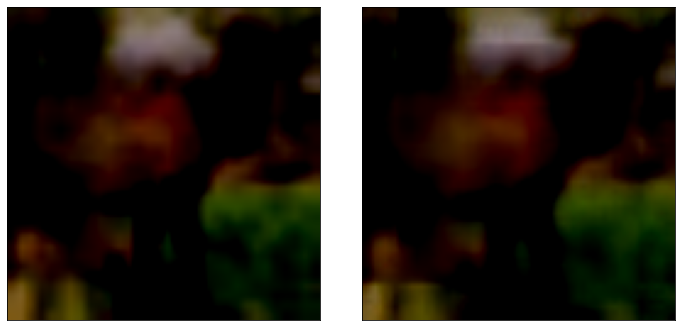





The MSE loss is:  0.00019003399938810617


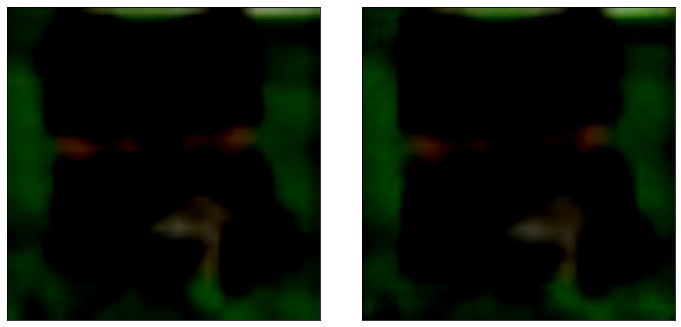





The MSE loss is:  0.005167169496417046


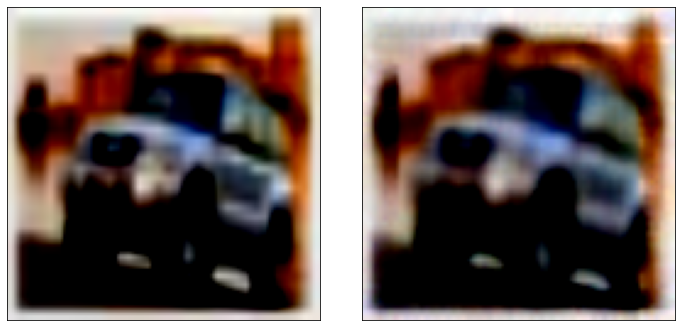





The MSE loss is:  0.004150243941694498


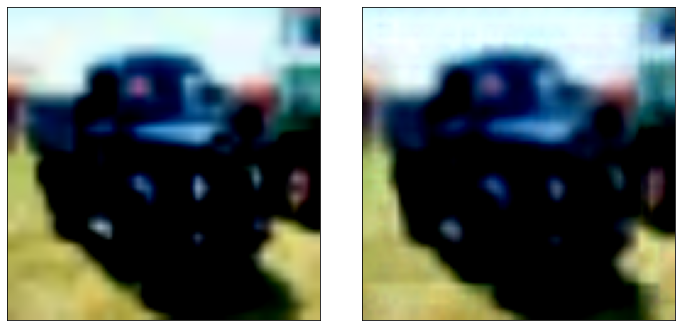





The MSE loss is:  0.002744871424511075


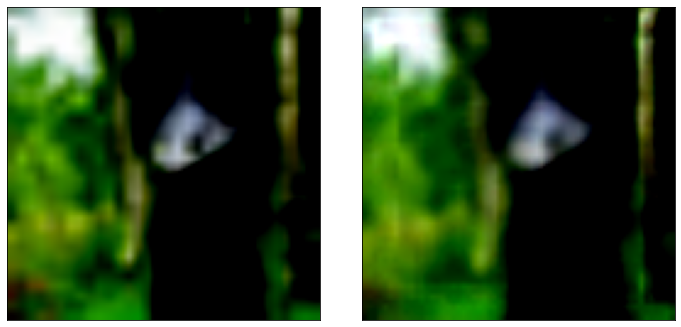





The MSE loss is:  0.0022605678532272577


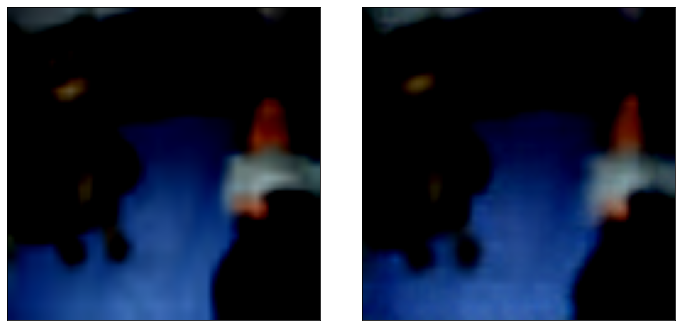





The MSE loss is:  0.0033117299899458885


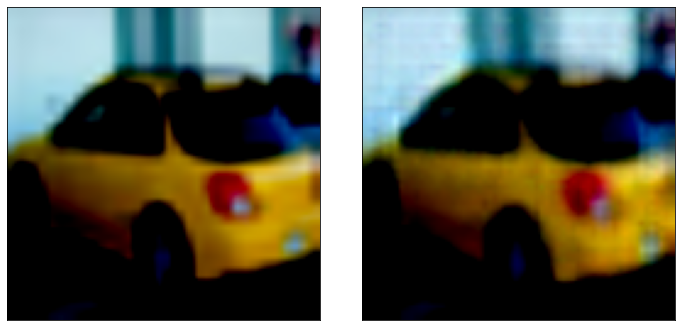





The MSE loss is:  0.002522043650969863


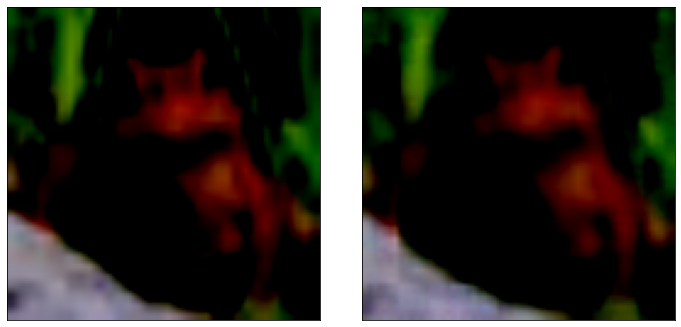





The MSE loss is:  0.0022988570854067802


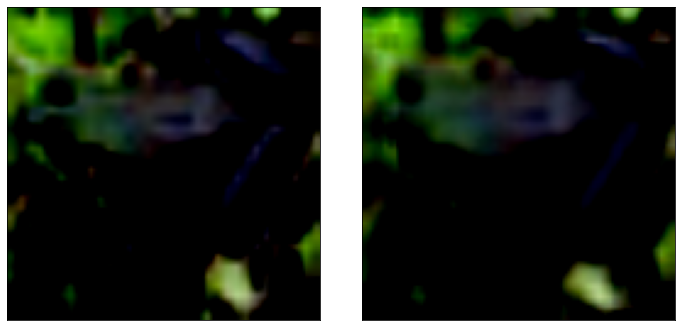





The MSE loss is:  0.005986776668578386


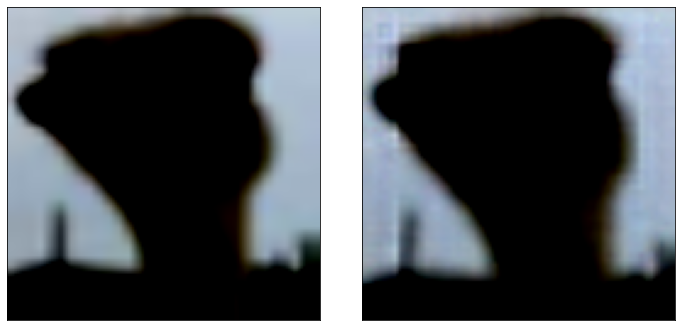





The MSE loss is:  0.00426624296233058


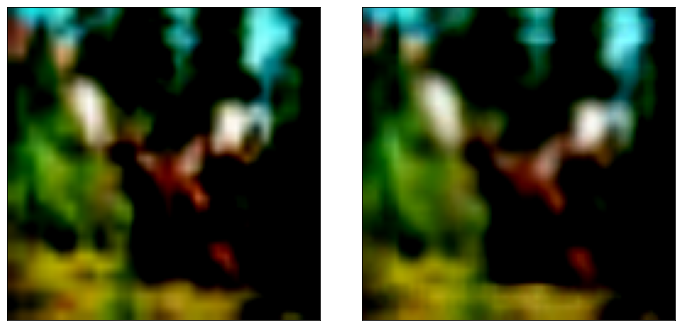





The MSE loss is:  0.002071419032290578


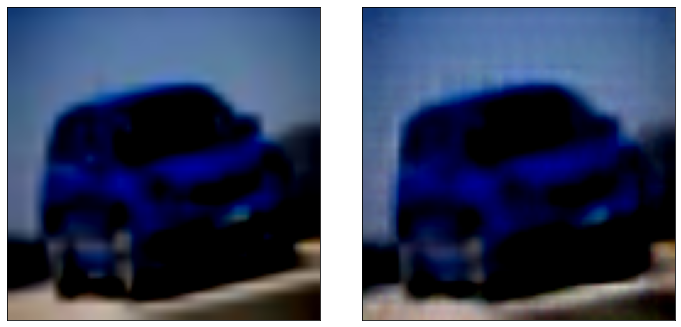

In [25]:
# compare 2 models by MSE and image reconstruction

vt.show_side_by_side_loss(images , im1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


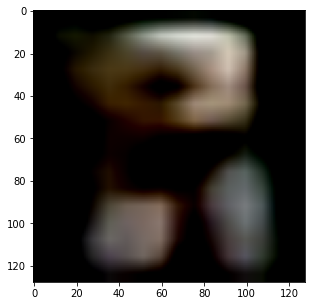

In [18]:
# image reconstruction 4 layered autoencoder

vt.show_image(im3[0], (5,5))